# Bước 1: Cài đặt thư viện

In [3]:
!pip install ultralytics -q
print("Ultralytics đã được cài đặt")
from ultralytics import YOLO
import os
from google.colab import drive
import gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.5 MB/s eta 0:00:00
Ultralytics đã được cài đặt
Creating new Ult

# Bước 2: Data preparation

In [4]:
# Kết nối Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Tải dataset từ liên kết Google Drive
gdown.download("https://drive.google.com/uc?id=1HTbfi7boMxqvnsC7LsizEDQ9J9nSglkD", "/content/dataset.zip", quiet=False)
!unzip /content/dataset.zip -d /content/
print("Dataset đã được giải nén")

Downloading...
From (original): https://drive.google.com/uc?id=1HTbfi7boMxqvnsC7LsizEDQ9J9nSglkD
From (redirected): https://drive.google.com/uc?id=1HTbfi7boMxqvnsC7LsizEDQ9J9nSglkD&confirm=t&uuid=450a639c-acbc-4dac-b81d-98da41e00a6c
To: /content/dataset.zip
100%|██████████| 300M/300M [00:06<00:00, 46.0MB/s]


Streaming output truncated to the last 5000 lines.
 extracting: /content/train/labels/007049_jpg.rf.c6e4b2bf1afff227b56ce9efec9aaba2.txt  
 extracting: /content/train/labels/007050_jpg.rf.0ffa459b20859c19b0efb3be9c40f1a1.txt  
 extracting: /content/train/labels/007050_jpg.rf.6885210eb26d3e08bd0e11a23b74151c.txt  
 extracting: /content/train/labels/007050_jpg.rf.f0039b7101ddb79866de14254b4aae4d.txt  
 extracting: /content/train/labels/007052_jpg.rf.7c03e04e6fde867820e712777314e823.txt  
 extracting: /content/train/labels/007052_jpg.rf.bfb821cbda071ad0c89746ff8ff04fef.txt  
 extracting: /content/train/labels/007052_jpg.rf.d99bc42d8656f3cdbcf6d108e5233211.txt  
 extracting: /content/train/labels/007058_jpg.rf.5aac121ca9c8b413c4e9bb3be3d320f0.txt  
 extracting: /content/train/labels/007058_jpg.rf.63f33505fb4c7a3bc43479d6c4eb9262.txt  
 extracting: /content/train/labels/007058_jpg.rf.dbd267b2f790302ba9d773a331d4da2e.txt  
 extracting: /content/train/labels/007059_jpg.rf.2ead38c6b2b55072ed60

In [7]:
# Kiểm tra và cập nhật data.yaml
!cat /content/data.yaml

# Cập nhật đường dẫn trong data.yaml
yaml_content = """
train: /content/train/images
val: /content/valid/images
test: /content/test/images
nc: 20
names: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
"""
with open('/content/data.yaml', 'w') as f:
    f.write(yaml_content)

print("Cập nhật data.yaml hoàn tất")


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 20
names: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

roboflow:
  workspace: monu-shah
  project: pascal-voc2007
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/monu-shah/pascal-voc2007/dataset/1Cập nhật data.yaml hoàn tất


In [8]:
# Kiểm tra số lượng ảnh và nhãn
!ls /content/train/images | wc -l
!ls /content/train/labels | wc -l
!ls /content/valid/images | wc -l
!ls /content/valid/labels | wc -l
!ls /content/test/images | wc -l
!ls /content/test/labels | wc -l
print("Kiểm tra số lượng ảnh và nhãn hoàn tất")

10518
10518
951
951
551
551
Kiểm tra số lượng ảnh và nhãn hoàn tất


# Bước 3: Huấn luyện YOLOv8

In [9]:
model = YOLO("yolov8n.pt")  # Mô hình nano cho tốc độ nhanh
model.train(
    data="/content/data.yaml",
    epochs=50,
    imgsz=416,
    batch=16,
    device=0,
    project="/content/drive/MyDrive/YOLOv8_Models",
    name="voc2007_experiment"
)
print("Huấn luyện hoàn tất, mô hình được lưu vào Google Drive")
# Lưu mô hình
#model.export(format="pt")  # Lưu mô hình dưới dạng .pt
#print("Mô hình đã được lưu lại")

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=voc2007_experiment2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,014,748 parameters, 3,014,732 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 988.5±402.7 MB/s, size: 24.7 KB)


train: Scanning /content/train/labels... 10518 images, 772 backgrounds, 0 corrupt: 100%|██████████| 10518/10518 [00:04<00:00, 2459.51it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.1 ms, read: 690.1±265.6 MB/s, size: 26.2 KB)


val: Scanning /content/valid/labels... 951 images, 71 backgrounds, 0 corrupt: 100%|██████████| 951/951 [00:01<00:00, 578.26it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to /content/drive/MyDrive/YOLOv8_Models/voc2007_experiment2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLOv8_Models/voc2007_experiment2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.01G      1.561       3.35      1.599         21        416: 100%|██████████| 658/658 [01:57<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.09it/s]

                   all        951       2710       0.43      0.453      0.404      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.29G       1.55      2.681      1.611         25        416: 100%|██████████| 658/658 [01:52<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.34it/s]


                   all        951       2710      0.418      0.414      0.379      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.3G      1.538      2.577      1.601         36        416: 100%|██████████| 658/658 [01:48<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.14it/s]


                   all        951       2710        0.4      0.333      0.298      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.32G      1.525       2.51      1.592         35        416: 100%|██████████| 658/658 [01:48<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.26it/s]


                   all        951       2710      0.476      0.384       0.35      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.34G      1.509      2.419      1.577         29        416: 100%|██████████| 658/658 [01:48<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.35it/s]


                   all        951       2710      0.413      0.364      0.327      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.36G      1.489      2.347      1.565         39        416: 100%|██████████| 658/658 [01:49<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.86it/s]


                   all        951       2710      0.433      0.397      0.355      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.37G      1.467      2.273      1.553         34        416: 100%|██████████| 658/658 [01:49<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.34it/s]


                   all        951       2710      0.468      0.407      0.385      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.39G      1.454      2.237      1.539         40        416: 100%|██████████| 658/658 [01:46<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]


                   all        951       2710      0.437      0.402      0.378      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.41G      1.448      2.182      1.534         24        416: 100%|██████████| 658/658 [01:47<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]


                   all        951       2710      0.485      0.396      0.401      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.43G      1.437      2.141      1.525         27        416: 100%|██████████| 658/658 [01:45<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.15it/s]

                   all        951       2710      0.487      0.432      0.408       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.44G      1.427      2.099      1.511         50        416: 100%|██████████| 658/658 [01:47<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.15it/s]

                   all        951       2710      0.465       0.41      0.393        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.46G      1.419      2.083       1.51         51        416: 100%|██████████| 658/658 [01:48<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.44it/s]


                   all        951       2710      0.519      0.387       0.41      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.47G      1.411      2.037      1.502         16        416: 100%|██████████| 658/658 [01:49<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.37it/s]


                   all        951       2710      0.526      0.459      0.448      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.49G      1.394      1.997      1.491         24        416: 100%|██████████| 658/658 [01:48<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.41it/s]


                   all        951       2710      0.592      0.402       0.45      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.51G      1.386      1.977       1.48         16        416: 100%|██████████| 658/658 [01:47<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.39it/s]

                   all        951       2710      0.478      0.452      0.425      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.52G      1.378      1.949      1.478         11        416: 100%|██████████| 658/658 [01:45<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.43it/s]


                   all        951       2710      0.531      0.438      0.445      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.54G       1.37      1.937      1.472         34        416: 100%|██████████| 658/658 [01:47<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.38it/s]


                   all        951       2710       0.51      0.436       0.44      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.56G       1.37      1.905      1.467         44        416: 100%|██████████| 658/658 [01:45<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.76it/s]


                   all        951       2710      0.528      0.468      0.446      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.58G      1.356      1.884       1.46         38        416: 100%|██████████| 658/658 [01:46<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


                   all        951       2710      0.532      0.464       0.46      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.6G      1.348      1.856      1.454         30        416: 100%|██████████| 658/658 [01:45<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.05it/s]

                   all        951       2710      0.546      0.447      0.457      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.61G       1.34       1.83      1.449         23        416: 100%|██████████| 658/658 [01:45<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.83it/s]


                   all        951       2710      0.569      0.451      0.469      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.63G      1.336      1.809      1.441         18        416: 100%|██████████| 658/658 [01:45<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.53it/s]


                   all        951       2710      0.538      0.474      0.478      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.64G      1.327      1.799      1.438         25        416: 100%|██████████| 658/658 [01:44<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.50it/s]


                   all        951       2710      0.549      0.463      0.469      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.66G      1.318      1.776      1.432         35        416: 100%|██████████| 658/658 [01:46<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.61it/s]

                   all        951       2710      0.564      0.457      0.476      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.68G      1.303      1.746      1.423         22        416: 100%|██████████| 658/658 [01:46<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.81it/s]

                   all        951       2710      0.566      0.461      0.483      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.7G      1.309      1.738      1.422         32        416: 100%|██████████| 658/658 [01:46<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.35it/s]


                   all        951       2710      0.553      0.496      0.488      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.71G      1.295      1.728      1.421         35        416: 100%|██████████| 658/658 [01:44<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]


                   all        951       2710      0.562      0.474      0.488      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.73G      1.293      1.707      1.414         27        416: 100%|██████████| 658/658 [01:45<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.56it/s]

                   all        951       2710      0.552      0.491      0.484      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.75G      1.288      1.683      1.408         33        416: 100%|██████████| 658/658 [01:46<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.54it/s]


                   all        951       2710      0.597      0.471      0.493      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.77G      1.278      1.666      1.403         34        416: 100%|██████████| 658/658 [01:45<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.11it/s]


                   all        951       2710      0.564      0.499      0.495      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.78G      1.278      1.636        1.4         32        416: 100%|██████████| 658/658 [01:45<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


                   all        951       2710      0.559      0.503      0.498       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.8G      1.268      1.632      1.392         10        416: 100%|██████████| 658/658 [01:45<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.36it/s]

                   all        951       2710      0.583      0.475      0.499      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.81G      1.255      1.618      1.381         26        416: 100%|██████████| 658/658 [01:45<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.52it/s]


                   all        951       2710      0.553      0.502      0.495      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.83G      1.254      1.604      1.382         14        416: 100%|██████████| 658/658 [01:46<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.38it/s]


                   all        951       2710      0.585      0.484      0.503      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.85G      1.247      1.593       1.38         43        416: 100%|██████████| 658/658 [01:44<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.10it/s]


                   all        951       2710      0.558      0.505      0.504       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.87G      1.245      1.575      1.375         22        416: 100%|██████████| 658/658 [01:44<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.44it/s]

                   all        951       2710      0.621      0.488      0.511      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.89G      1.238      1.559      1.367         17        416: 100%|██████████| 658/658 [01:45<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.61it/s]

                   all        951       2710      0.583      0.495      0.504      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       1.9G       1.23      1.548      1.367         32        416: 100%|██████████| 658/658 [01:48<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.65it/s]

                   all        951       2710      0.592      0.491      0.506      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.92G      1.225      1.538      1.361         17        416: 100%|██████████| 658/658 [01:44<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


                   all        951       2710        0.6      0.485      0.512      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.93G      1.213      1.522      1.353         24        416: 100%|██████████| 658/658 [01:46<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]

                   all        951       2710      0.614      0.487       0.51      0.292


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.96G      1.217      1.285      1.362         19        416: 100%|██████████| 658/658 [01:43<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.43it/s]


                   all        951       2710      0.592      0.486      0.502       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.97G      1.195      1.225      1.344         18        416: 100%|██████████| 658/658 [01:40<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.68it/s]

                   all        951       2710      0.563      0.496      0.498      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.99G      1.177      1.193      1.338         26        416: 100%|██████████| 658/658 [01:39<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.38it/s]

                   all        951       2710        0.6      0.487      0.497      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         2G      1.165      1.174       1.33         10        416: 100%|██████████| 658/658 [01:38<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.54it/s]

                   all        951       2710       0.59      0.475        0.5      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.02G      1.156      1.155      1.322          8        416: 100%|██████████| 658/658 [01:41<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.73it/s]


                   all        951       2710       0.59      0.481      0.502      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.04G      1.148       1.15      1.318         18        416: 100%|██████████| 658/658 [01:42<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.21it/s]

                   all        951       2710      0.551      0.498      0.493      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.05G      1.137      1.123       1.31         14        416: 100%|██████████| 658/658 [01:41<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.52it/s]

                   all        951       2710      0.581       0.48      0.493      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.07G      1.129      1.112      1.302         15        416: 100%|██████████| 658/658 [01:42<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]

                   all        951       2710      0.598      0.473      0.495       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.09G      1.122      1.099      1.299          7        416: 100%|██████████| 658/658 [01:39<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.13it/s]


                   all        951       2710      0.592      0.472      0.497      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.1G      1.122      1.094      1.297         11        416: 100%|██████████| 658/658 [01:42<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]

                   all        951       2710      0.575      0.489      0.496      0.289



50 epochs completed in 1.547 hours.
Optimizer stripped from /content/drive/MyDrive/YOLOv8_Models/voc2007_experiment2/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/YOLOv8_Models/voc2007_experiment2/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/YOLOv8_Models/voc2007_experiment2/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.60it/s]


                   all        951       2710       0.62      0.488      0.511      0.292
             aeroplane         46         72      0.772      0.612      0.666      0.373
               bicycle         42         74      0.639      0.581        0.6      0.305
                  bird         61        108      0.579      0.389      0.405      0.229
                  boat         36         77      0.501      0.338      0.346      0.194
                bottle         46        115      0.628      0.322      0.344      0.132
                   bus         23         27      0.582      0.593      0.583      0.443
                   car        131        302      0.754      0.599      0.674      0.419
                   cat         50         60      0.715        0.5      0.586      0.314
                 chair        113        304      0.681      0.362      0.429      0.208
                   cow         26         56      0.592      0.554      0.528      0.294
           diningtabl

# Bước 4: Đánh giá mô hình



In [10]:
model.val()
print("Đánh giá mô hình hoàn tất")


Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 860.9±263.6 MB/s, size: 27.6 KB)


val: Scanning /content/valid/labels.cache... 951 images, 71 backgrounds, 0 corrupt: 100%|██████████| 951/951 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:09<00:00,  6.19it/s]


                   all        951       2710       0.62      0.487      0.511      0.292
             aeroplane         46         72      0.773      0.611      0.665      0.371
               bicycle         42         74      0.638      0.581      0.599      0.305
                  bird         61        108      0.581      0.389      0.404      0.228
                  boat         36         77      0.511      0.338      0.346      0.194
                bottle         46        115      0.629      0.322      0.342      0.131
                   bus         23         27      0.583      0.593      0.583      0.442
                   car        131        302      0.754      0.598      0.679      0.421
                   cat         50         60      0.716        0.5      0.587      0.315
                 chair        113        304      0.679      0.362      0.429      0.208
                   cow         26         56      0.596      0.554      0.529      0.294
           diningtabl

# Bước 5: Inference


image 1/1 /content/valid/images/000023_jpg.rf.9ac396b9f5b682a97eca653545cc5d89.jpg: 416x416 2 bicycles, 8.9ms
Speed: 0.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


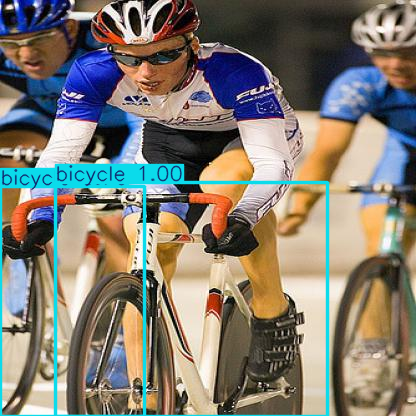

Suy luận hoàn tất


In [11]:
# Suy luận (Inference)
model = YOLO("/content/drive/MyDrive/YOLOv8_Models/voc2007_experiment/weights/best.pt")
results = model.predict(source="/content/valid/images/000023_jpg.rf.9ac396b9f5b682a97eca653545cc5d89.jpg", conf=0.25, iou=0.45)
results[0].show()
print("Suy luận hoàn tất")

In [12]:
# Lưu kết quả suy luận
results[0].save("/content/drive/MyDrive/YOLOv8_Models/voc2007_experiment/output_000023.jpg")
print("Kết quả suy luận đã được lưu vào Google Drive")

Kết quả suy luận đã được lưu vào Google Drive
